In [ ]:
%load_ext autoreload
%autoreload 2

In [1]:
import pandas as pd
import sys 

import plotly.express as px

from dtaidistance import dtw
import numpy as np

from sklearn.cluster import DBSCAN
from sklearn import metrics

from sklearn import manifold

In [2]:
pd.set_option('display.max_columns', 200)
pd.set_option('display.max_rows', 100)
pd.set_option('display.min_rows', 100)

In [3]:
sys.path.append("../")

In [4]:
from utils.config import PLANT_2_PROCESSED_DATA_PATH

In [5]:
from utils.utils import (
    plot_cluster_curves,
    plot_cluster_analysis
)

In [6]:
plant_daily_curves_df = pd.read_parquet(PLANT_2_PROCESSED_DATA_PATH)

In [7]:
plant_daily_curves_df.head()

inverter_production_of_day,hour,min,inverter_10_day_136,inverter_10_day_137,inverter_10_day_138,inverter_10_day_139,inverter_10_day_140,inverter_10_day_141,inverter_10_day_142,inverter_10_day_143,inverter_10_day_144,inverter_10_day_145,inverter_10_day_146,inverter_10_day_147,inverter_10_day_148,inverter_10_day_149,inverter_10_day_150,inverter_10_day_151,inverter_10_day_152,inverter_10_day_153,inverter_10_day_154,inverter_10_day_155,inverter_10_day_156,inverter_10_day_157,inverter_10_day_158,inverter_10_day_159,inverter_10_day_160,inverter_10_day_161,inverter_10_day_162,inverter_10_day_163,inverter_10_day_164,inverter_10_day_165,inverter_10_day_166,inverter_10_day_167,inverter_10_day_168,inverter_10_day_169,inverter_11_day_136,inverter_11_day_137,inverter_11_day_138,inverter_11_day_139,inverter_11_day_140,inverter_11_day_141,inverter_11_day_142,inverter_11_day_143,inverter_11_day_144,inverter_11_day_145,inverter_11_day_146,inverter_11_day_147,inverter_11_day_148,inverter_11_day_149,inverter_11_day_150,inverter_11_day_151,inverter_11_day_152,inverter_11_day_153,inverter_11_day_154,inverter_11_day_155,inverter_11_day_156,inverter_11_day_157,inverter_11_day_158,inverter_11_day_159,inverter_11_day_160,inverter_11_day_161,inverter_11_day_162,inverter_11_day_163,inverter_11_day_164,inverter_11_day_165,inverter_11_day_166,inverter_11_day_167,inverter_11_day_168,inverter_11_day_169,inverter_12_day_136,inverter_12_day_137,inverter_12_day_138,inverter_12_day_139,inverter_12_day_140,inverter_12_day_141,inverter_12_day_142,inverter_12_day_143,inverter_12_day_144,inverter_12_day_145,inverter_12_day_146,inverter_12_day_147,inverter_12_day_148,inverter_12_day_149,inverter_12_day_150,inverter_12_day_151,inverter_12_day_152,inverter_12_day_153,inverter_12_day_154,inverter_12_day_155,inverter_12_day_156,inverter_12_day_157,inverter_12_day_158,inverter_12_day_159,inverter_12_day_160,inverter_12_day_161,inverter_12_day_162,inverter_12_day_163,inverter_12_day_164,inverter_12_day_165,...,inverter_6_day_164,inverter_6_day_165,inverter_6_day_166,inverter_6_day_167,inverter_6_day_168,inverter_6_day_169,inverter_7_day_136,inverter_7_day_137,inverter_7_day_138,inverter_7_day_139,inverter_7_day_140,inverter_7_day_141,inverter_7_day_142,inverter_7_day_143,inverter_7_day_144,inverter_7_day_145,inverter_7_day_146,inverter_7_day_147,inverter_7_day_148,inverter_7_day_149,inverter_7_day_150,inverter_7_day_151,inverter_7_day_152,inverter_7_day_153,inverter_7_day_154,inverter_7_day_155,inverter_7_day_156,inverter_7_day_157,inverter_7_day_158,inverter_7_day_159,inverter_7_day_160,inverter_7_day_161,inverter_7_day_162,inverter_7_day_163,inverter_7_day_164,inverter_7_day_165,inverter_7_day_166,inverter_7_day_167,inverter_7_day_168,inverter_7_day_169,inverter_8_day_136,inverter_8_day_137,inverter_8_day_138,inverter_8_day_139,inverter_8_day_140,inverter_8_day_141,inverter_8_day_142,inverter_8_day_143,inverter_8_day_144,inverter_8_day_145,inverter_8_day_146,inverter_8_day_147,inverter_8_day_148,inverter_8_day_149,inverter_8_day_150,inverter_8_day_151,inverter_8_day_152,inverter_8_day_153,inverter_8_day_154,inverter_8_day_155,inverter_8_day_156,inverter_8_day_157,inverter_8_day_158,inverter_8_day_159,inverter_8_day_160,inverter_8_day_161,inverter_8_day_162,inverter_8_day_163,inverter_8_day_164,inverter_8_day_165,inverter_8_day_166,inverter_8_day_167,inverter_8_day_168,inverter_8_day_169,inverter_9_day_136,inverter_9_day_137,inverter_9_day_138,inverter_9_day_139,inverter_9_day_140,inverter_9_day_141,inverter_9_day_150,inverter_9_day_151,inverter_9_day_152,inverter_9_day_153,inverter_9_day_154,inverter_9_day_155,inverter_9_day_156,inverter_9_day_157,inverter_9_day_158,inverter_9_day_159,inverter_9_day_160,inverter_9_day_161,inverter_9_day_162,inverter_9_day_163,inverter_9_day_164,inverter_9_day_165,inverter_9_day_166,inverter_9_day_167,inverter_9_day_168,inverter_9_day_169
0,5,0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,

In [8]:
plant_daily_curves_df = plant_daily_curves_df.fillna(-0.1)
plant_daily_curves_df['time'] = pd.to_datetime(plant_daily_curves_df['hour'].astype(str) + ":" + plant_daily_curves_df['min'].astype(str), format='%H:%M').dt.time

In [9]:
%%time
daily_curves_array = plant_daily_curves_df.drop(['time','hour', "min"], axis=1).T.to_numpy()

CPU times: user 1.93 ms, sys: 1.05 ms, total: 2.98 ms
Wall time: 2.08 ms


In [10]:
%%time

clustering_result_df = pd.DataFrame({"days_names": plant_daily_curves_df.drop(['time', 'hour', "min"], axis=1).columns})
clustering_result_df["day"] = clustering_result_df["days_names"].str.split('_', n=2).apply(lambda x: x[2])

CPU times: user 6.38 ms, sys: 0 ns, total: 6.38 ms
Wall time: 4.27 ms


In [11]:
%%time
distance_matrix = dtw.distance_matrix_fast(daily_curves_array, window=4)

CPU times: user 575 ms, sys: 29.5 ms, total: 604 ms
Wall time: 91.6 ms


In [73]:
#for eps in np.arange(0.1, 0.7, 0.01):
#    for min_samples in [5, 10, 15, 20]:
#        print(f"eps = {eps}, min_samples = {min_samples} ")
#        clustering = DBSCAN(eps=eps, min_samples=min_samples, metric='precomputed')
#        clustering.fit(distance_matrix)
#        labels = clustering.labels_
#        n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
#        n_noise_ = list(labels).count(-1)
#        print("Estimated number of clusters: %d" % n_clusters_)
#        print("Estimated number of noise points: %d" % n_noise_)
#        print(f"Silhouette Coefficient: {metrics.silhouette_score(distance_matrix, labels):.3f}")
#        print("========================================")   

In [74]:
%%time

clustering = DBSCAN(eps=0.439, min_samples=10, metric='precomputed')
clustering.fit(distance_matrix)

labels = clustering.labels_
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print("Estimated number of clusters: %d" % n_clusters_)
print("Estimated number of noise points: %d" % n_noise_)
print(f"Silhouette Coefficient: {metrics.silhouette_score(distance_matrix, labels):.3f}")

Estimated number of clusters: 19
Estimated number of noise points: 192
Silhouette Coefficient: 0.199
CPU times: user 219 ms, sys: 179 ms, total: 398 ms
Wall time: 43.4 ms


In [75]:
%%time
clustering_result_df['clustering_labels'] = labels
clustering_result_df['clustering_labels'] = clustering_result_df['clustering_labels'].astype("category")

CPU times: user 1.38 ms, sys: 1.09 ms, total: 2.47 ms
Wall time: 1.64 ms


In [76]:
%%time
mds_scaling = manifold.MDS(
    n_components=2,
    max_iter=50,
    n_init=4,
    random_state=42,
    dissimilarity='precomputed'
)
s_scaling = mds_scaling.fit_transform(distance_matrix)

CPU times: user 14 s, sys: 9.6 s, total: 23.6 s
Wall time: 1.98 s


In [77]:
clustering_result_df['x'] = s_scaling[:, 0]
clustering_result_df['y'] = s_scaling[:, 1]

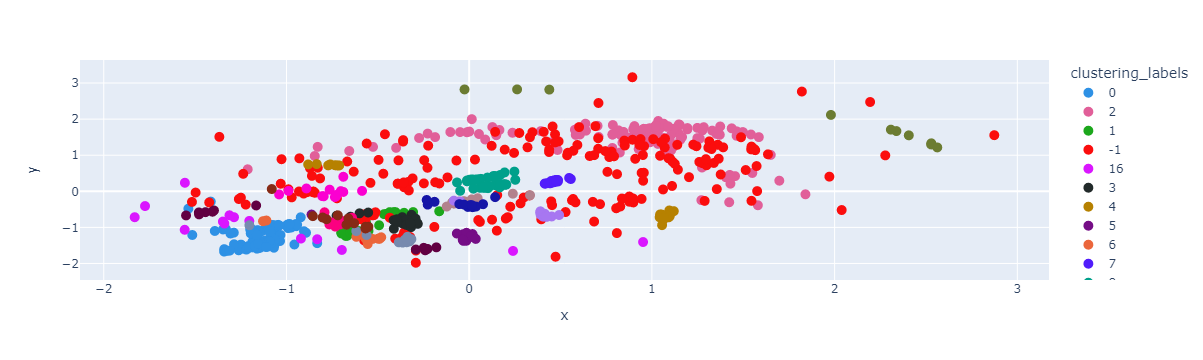

CPU times: user 116 ms, sys: 4.3 ms, total: 120 ms
Wall time: 113 ms


In [78]:
%%time
fig = px.scatter(clustering_result_df, y="y", x="x", color="clustering_labels", color_discrete_sequence=px.colors.qualitative.Dark24)
fig.update_traces(marker_size=10)
fig.show()

In [79]:
clustering_result_df.groupby(["clustering_labels"]).agg({"clustering_labels":["count"]})


,clustering_labels
,count
clustering_labels,
-1,192
0,117
1,22
2,123
3,21
4,22
5,13
6,12


In [86]:
%%time
for cluster in sorted(list(clustering_result_df['clustering_labels'].unique())):
    print(f"cluster ====> {cluster}")
    print(clustering_result_df[clustering_result_df['clustering_labels'] == cluster].groupby(["day"]).agg({"day":["count"]}))
    print('========================================================================')
    #plot_cluster_curves(plant_daily_curves_df, clustering_result_df, cluster)

cluster ====> -1
          day
        count
day          
day_136     3
day_137     7
day_138    12
day_139     8
day_140    10
day_141     1
day_142     5
day_143     1
day_144     2
day_145     1
day_147     1
day_148     1
day_149     1
day_150    22
day_151     9
day_152     1
day_154    22
day_155    22
day_156    17
day_157     1
day_158     1
day_159     4
day_161     3
day_162    10
day_165     7
day_166     8
day_167    10
day_168     2
cluster ====> 0
          day
        count
day          
day_136    11
day_139    10
day_141     3
day_142     6
day_143     9
day_144     9
day_145     8
day_146    14
day_147    13
day_148     8
day_151    13
day_160    13
cluster ====> 1
          day
        count
day          
day_137    12
day_138    10
cluster ====> 2
          day
        count
day          
day_136     6
day_137     3
day_139     4
day_141     8
day_142     7
day_143     7
day_144     7
day_145     9
day_146     4
day_147     4
day_148     9
day_149     6
day_156    

Inverters in the cluster 18 for day_161


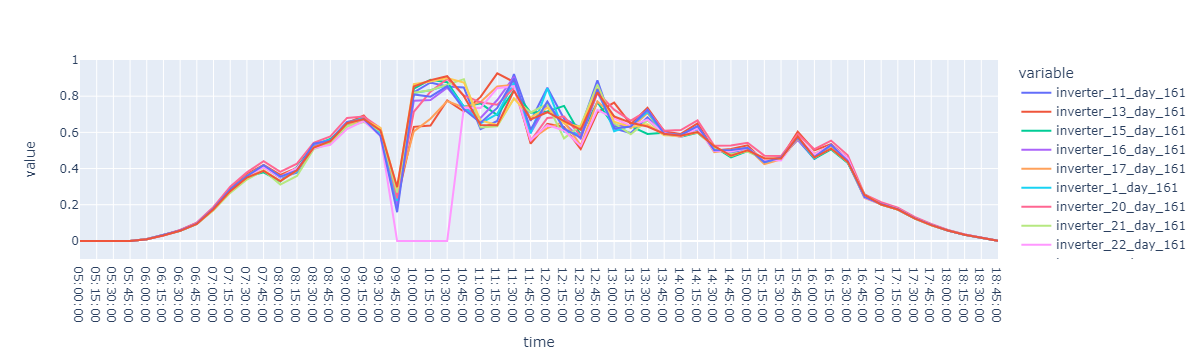

Inverters not in the cluster 18 for day_161


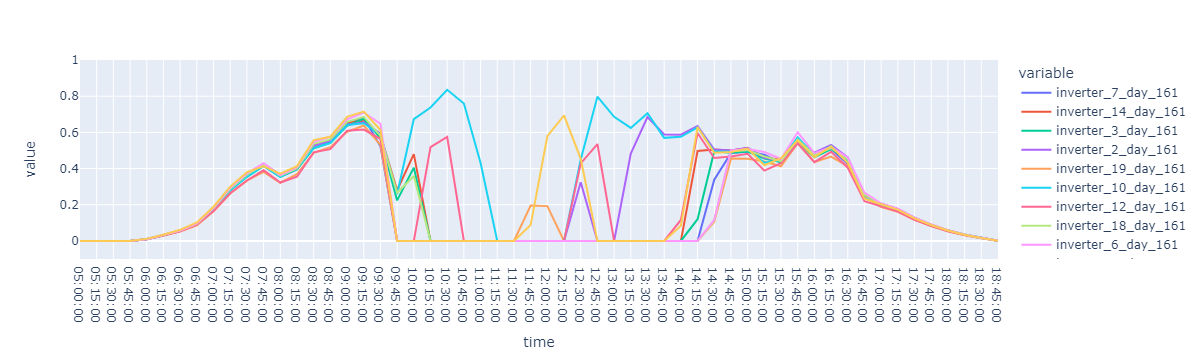

              days_names      day clustering_labels         x         y
25   inverter_10_day_161  day_161                -1  0.676929 -0.292956
93   inverter_12_day_161  day_161                -1  0.659899  0.977820
161  inverter_14_day_161  day_161                 2  0.878534  1.485210
289  inverter_18_day_161  day_161                 2  0.949088  1.587751
323  inverter_19_day_161  day_161                 2  1.064602  1.478689
485   inverter_2_day_161  day_161                 2  0.087606  1.434950
519   inverter_3_day_161  day_161                 2  0.936724  1.518040
553   inverter_4_day_161  day_161                -1  0.122996  1.260617
613   inverter_6_day_161  day_161                 2  0.955058  1.731508
647   inverter_7_day_161  day_161                 2  0.942316  1.688842


In [81]:
cluster = 18
day = "day_161"
plot_cluster_analysis(clustering_result_df, plant_daily_curves_df, day, cluster)

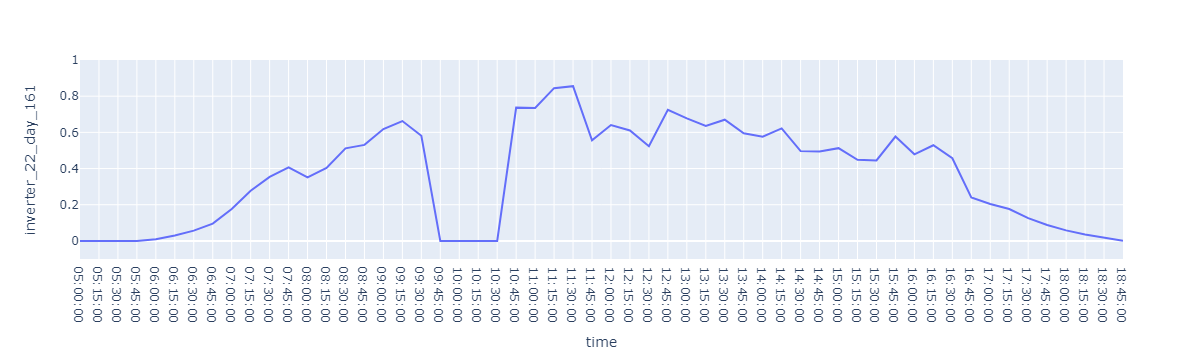

In [87]:
fig = px.line(plant_daily_curves_df, x='time', y='inverter_22_day_161', range_y=[-0.1, 1])
fig.show()

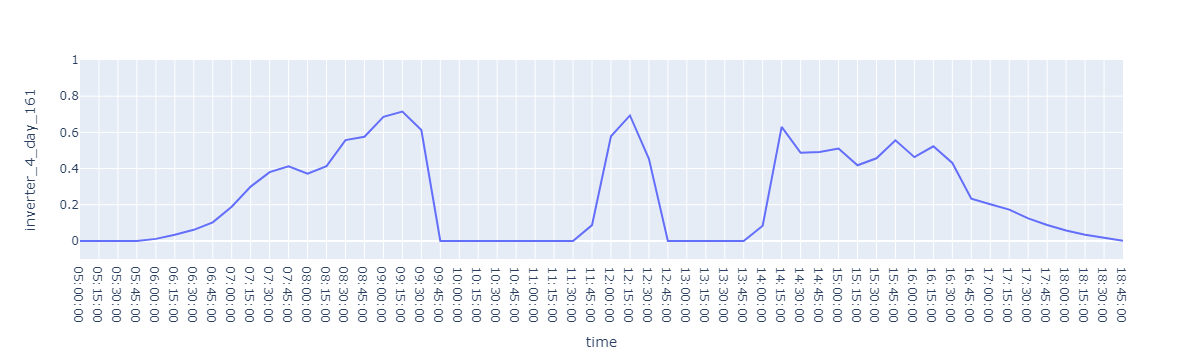

In [88]:
fig = px.line(plant_daily_curves_df, x='time', y='inverter_4_day_161', range_y=[-0.1, 1])
fig.show()

Inverters in the cluster 12 for day_141


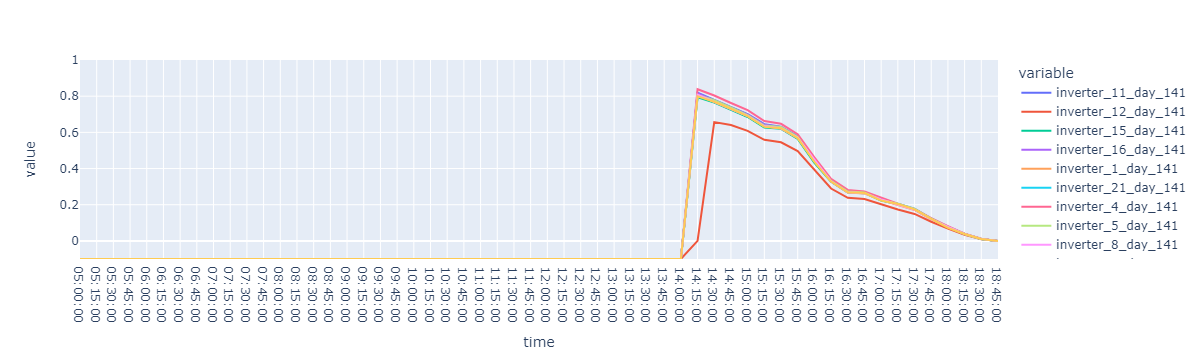

Inverters not in the cluster 12 for day_141


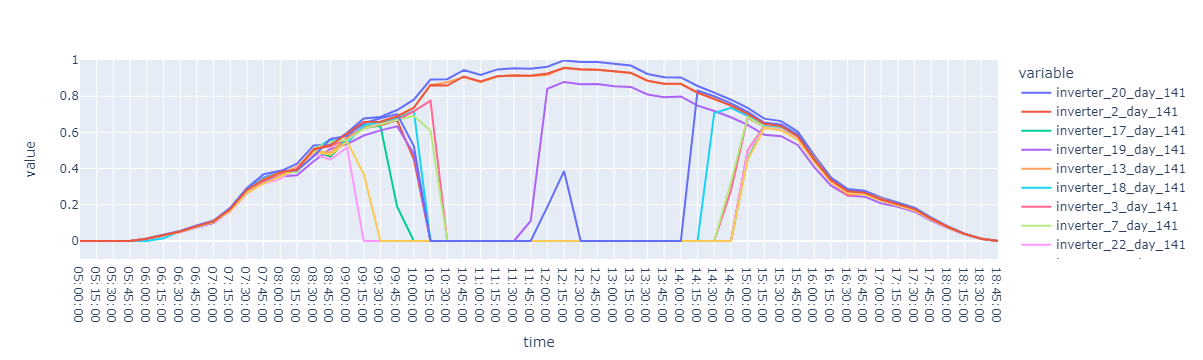

              days_names      day clustering_labels         x         y
5    inverter_10_day_141  day_141                 2  1.194033  1.716598
107  inverter_13_day_141  day_141                 0 -1.248894 -1.477205
141  inverter_14_day_141  day_141                 0 -1.248467 -1.488252
235  inverter_17_day_141  day_141                 2  1.144671  1.615895
269  inverter_18_day_141  day_141                 2  0.639289  1.679659
303  inverter_19_day_141  day_141                 2 -1.212243  0.609298
371  inverter_20_day_141  day_141                 0 -1.340757 -1.602732
431  inverter_22_day_141  day_141                 2  1.064404  1.873382
465   inverter_2_day_141  day_141                 2  1.030210  1.579626
499   inverter_3_day_141  day_141                 2  0.784492  1.576486
593   inverter_6_day_141  day_141                -1  0.489417  1.383715
627   inverter_7_day_141  day_141                 2  0.784391  1.570720


In [82]:
cluster = 12 
day = "day_141"
plot_cluster_analysis(clustering_result_df, plant_daily_curves_df, day, cluster)

Inverters in the cluster 5 for day_157


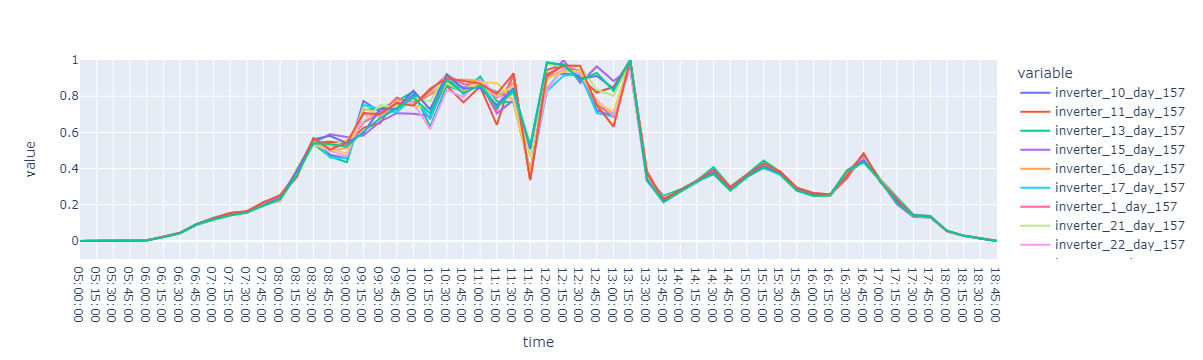

Inverters not in the cluster 5 for day_157


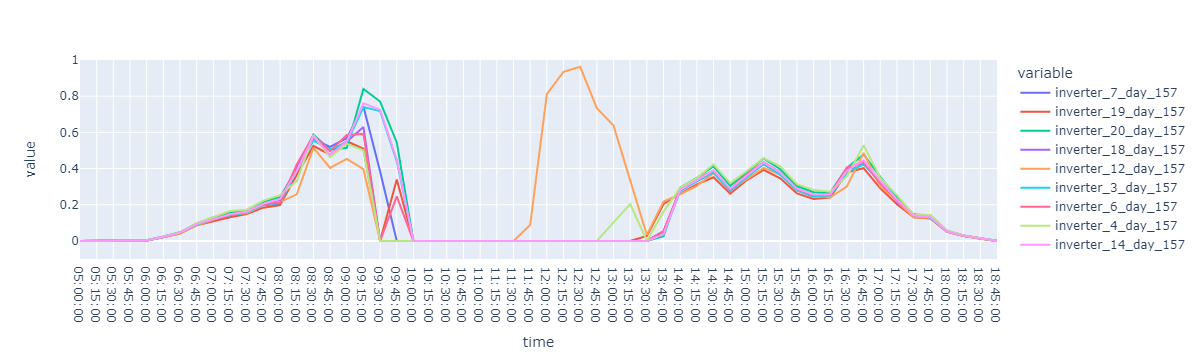

              days_names      day clustering_labels         x         y
89   inverter_12_day_157  day_157                -1  1.288801 -0.265987
157  inverter_14_day_157  day_157                 2  0.850760  1.531349
285  inverter_18_day_157  day_157                 2  1.165263  1.504861
319  inverter_19_day_157  day_157                 2  1.240846  1.338104
387  inverter_20_day_157  day_157                 2  0.831319  1.550728
515   inverter_3_day_157  day_157                 2  1.099950  1.372919
549   inverter_4_day_157  day_157                 2  0.996505  1.497946
609   inverter_6_day_157  day_157                 2  0.844866  1.645867
643   inverter_7_day_157  day_157                 2  1.155625  1.429222


In [83]:
cluster = 5
day = "day_157"
plot_cluster_analysis(clustering_result_df, plant_daily_curves_df, day, cluster)